# Set-up

### Imports

In [1]:
# --- Data handling and visualization ---
import pandas as pd  # Dataframe tools
from tabulate import tabulate  # Pretty printing for dataframes

import seaborn as sns  # Easier plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

### Globals

In [2]:
# --- Visualization ---
rc_dict = {
  "savefig.dpi": 900,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds 
  "savefig.transparent": False,
  "figure.figsize": (14, 10),  # Default (width, height) of figure
}
plt.rcParams.update(rc_dict)

## Data preprocessing

In [3]:
synth_n2v = pd.read_parquet("../results/dataframes/dataframe-merged_EMB_ex04_DK_20220928.parquet")
synth_spectral = pd.read_parquet("../results/dataframes/dataframe-merged_EMB_ex06_DK_20220928.parquet")

idx_cols = ["N", "avgk", "mu", "gamma", "tau", "rep", "pfi", "metric"]
synth = pd.merge(synth_n2v, synth_spectral, on=idx_cols, suffixes=["_n2v", "_spectral"])

df = synth.melt(id_vars=idx_cols, var_name="Performance Measure", value_name="Performance")
df = df.astype({
    'N': 'int8',
    'avgk': 'int8',
    'rep': 'int8',
    'mu': 'float32',
    'gamma': 'float32',
    'tau': 'float32',
    'pfi': 'float32',
    'metric': 'category',
    'Performance Measure': 'string',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14632 entries, 0 to 14631
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   N                    14632 non-null  int8    
 1   avgk                 14632 non-null  int8    
 2   mu                   14632 non-null  float32 
 3   gamma                14632 non-null  float32 
 4   tau                  14632 non-null  float32 
 5   rep                  14632 non-null  int8    
 6   pfi                  14632 non-null  float32 
 7   metric               14632 non-null  category
 8   Performance Measure  14632 non-null  string  
 9   Performance          14632 non-null  float64 
dtypes: category(1), float32(4), float64(1), int8(3), string(1)
memory usage: 514.7 KB


In [4]:
real = pd.read_parquet("../results/dataframes/dataframe-merged_EMB_ex04R_DK_20220928.parquet")
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 59
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   largest_component  120 non-null    bool   
 1   dimensions         120 non-null    int64  
 2   walk_length        120 non-null    int64  
 3   num_walks          120 non-null    int64  
 4   workers            120 non-null    int64  
 5   window             120 non-null    int64  
 6   min_count          120 non-null    int64  
 7   batch_words        120 non-null    int64  
 8   system             120 non-null    object 
 9   left               120 non-null    int64  
 10  right              120 non-null    int64  
 11  metric             120 non-null    object 
 12  pfi                120 non-null    float64
 13  repetition         120 non-null    int64  
 14  Accuracy           120 non-null    float64
 15  AUROC              120 non-null    float64
dtypes: bool(1), float64(3), int

# Figures

## Synthetic

### AUROC

<Figure size 1400x1000 with 0 Axes>

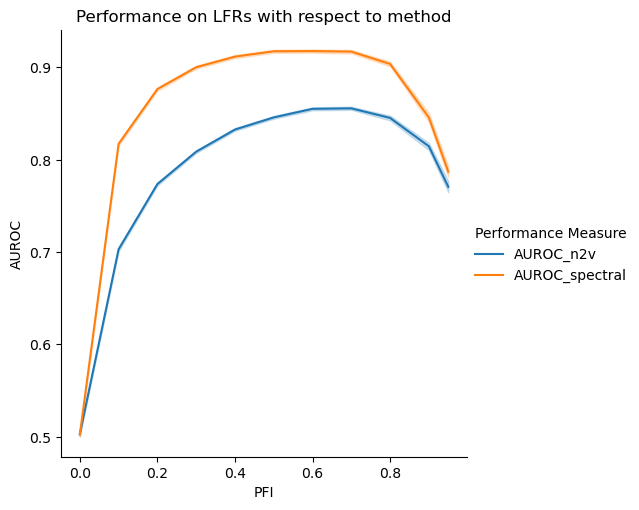

In [6]:
plt.figure()
sns.relplot(
    data=df.loc[~df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"])], kind="line",
    x="pfi", y="Performance",
    hue="Performance Measure",
)

plt.title("Performance on LFRs with respect to method")
plt.ylabel("AUROC")
plt.xlabel("PFI")
plt.savefig("../results/plots/scatter_auroc-pfi_EMB_ex04-ex06-_DK_20220928.png")

<Figure size 1400x1000 with 0 Axes>

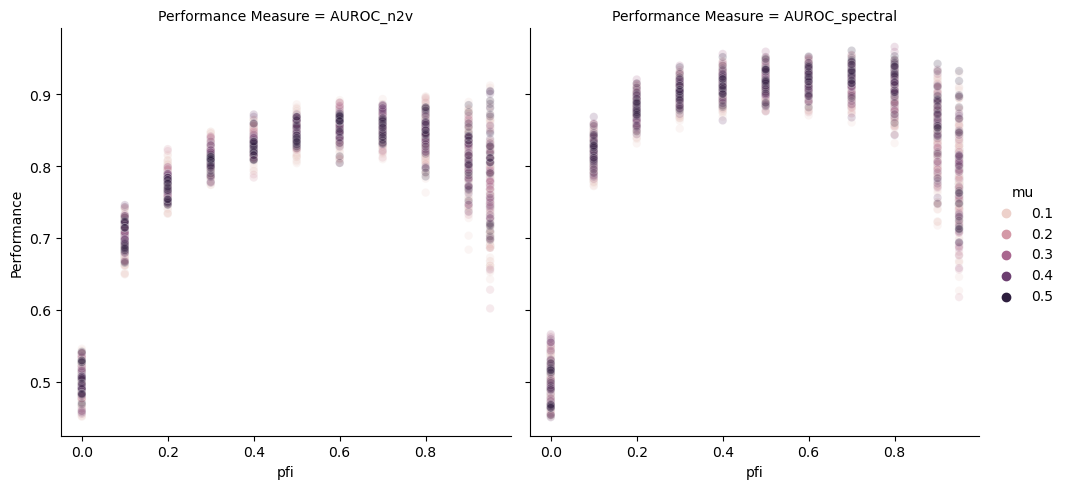

In [75]:
plt.figure()
sns.relplot(
    data=df.loc[~df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"])], kind="scatter",
    x="pfi", y="Performance",
    col="Performance Measure",
    hue="mu",
    alpha=0.2
)

<Figure size 1400x1000 with 0 Axes>

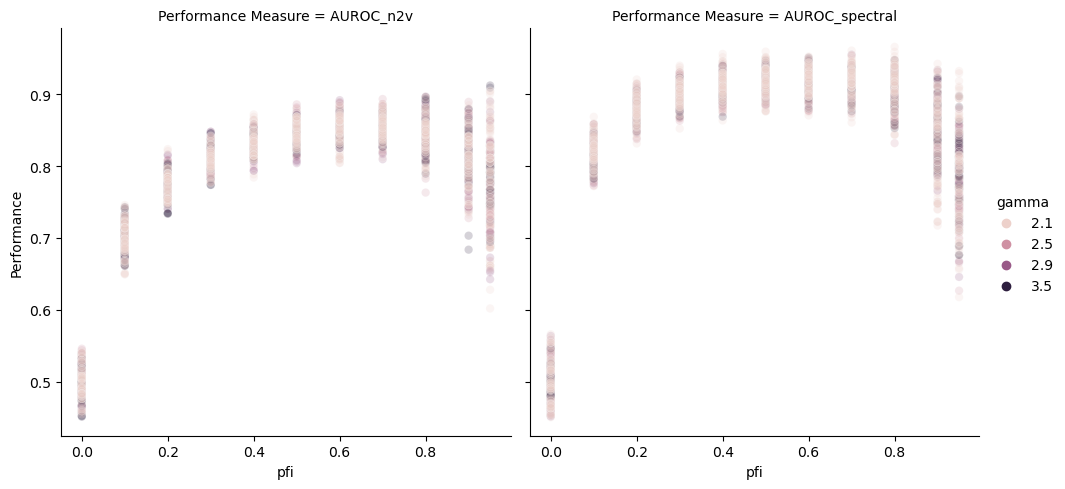

In [76]:
plt.figure()
sns.relplot(
    data=df.loc[~df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"])], kind="scatter",
    x="pfi", y="Performance",
    col="Performance Measure",
    hue="gamma",
    alpha=0.2
)

<Figure size 1400x1000 with 0 Axes>

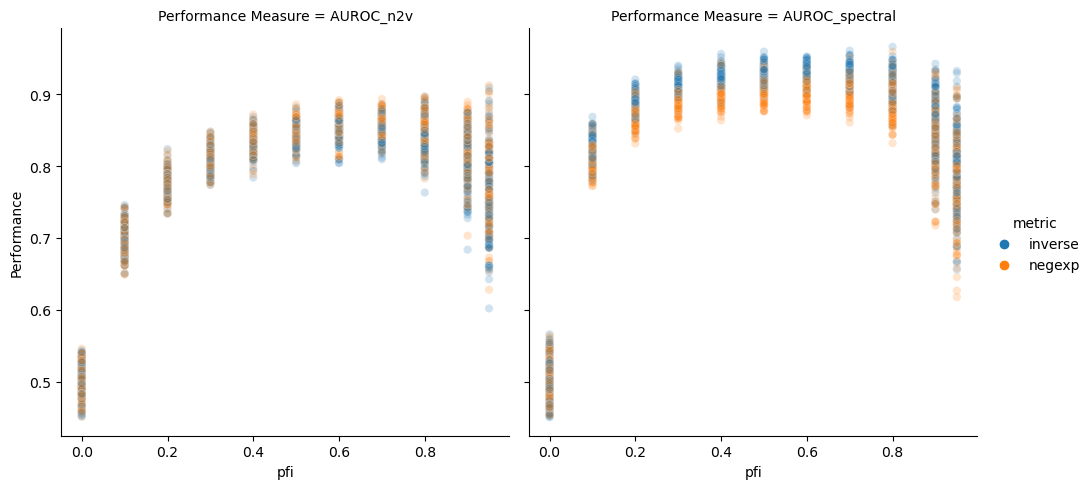

In [77]:
plt.figure()
sns.relplot(
    data=df.loc[~df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"])], kind="scatter",
    x="pfi", y="Performance",
    col="Performance Measure",
    hue="metric",
    alpha=0.2
)

<Figure size 1400x1000 with 0 Axes>

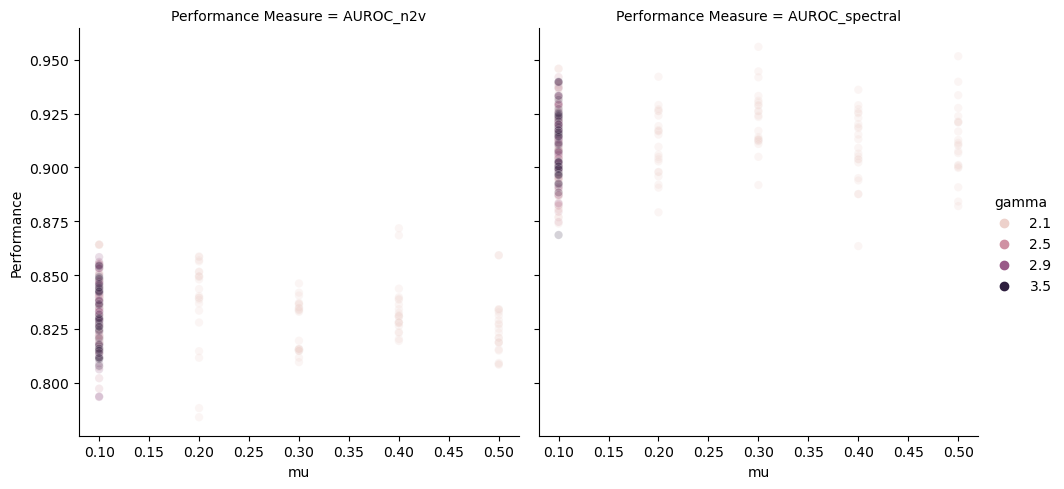

In [78]:
plt.figure()
sns.relplot(
    data=df.loc[
        ~(df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"]))
        & (df["pfi"] == 0.4)
    ], kind="scatter",
    x="mu", y="Performance",
    col="Performance Measure",
    hue="gamma",
    alpha=0.2
)

<Figure size 1400x1000 with 0 Axes>

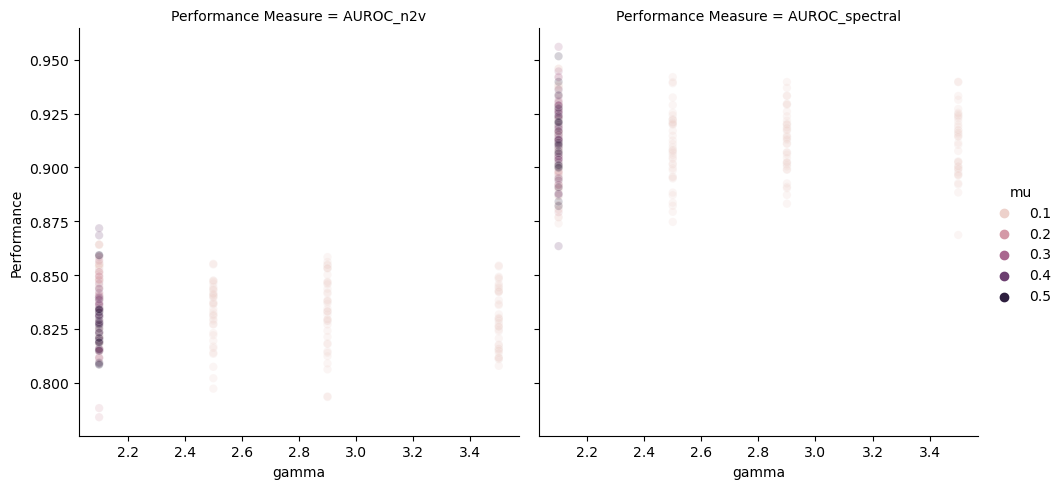

In [82]:
plt.figure()
sns.relplot(
    data=df.loc[
        ~(df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"]))
        & (df["pfi"] == 0.4)
    ], kind="scatter",
    x="gamma", y="Performance",
    col="Performance Measure",
    hue="mu",
    alpha=0.2
)

### Accuracy

<Figure size 1400x1000 with 0 Axes>

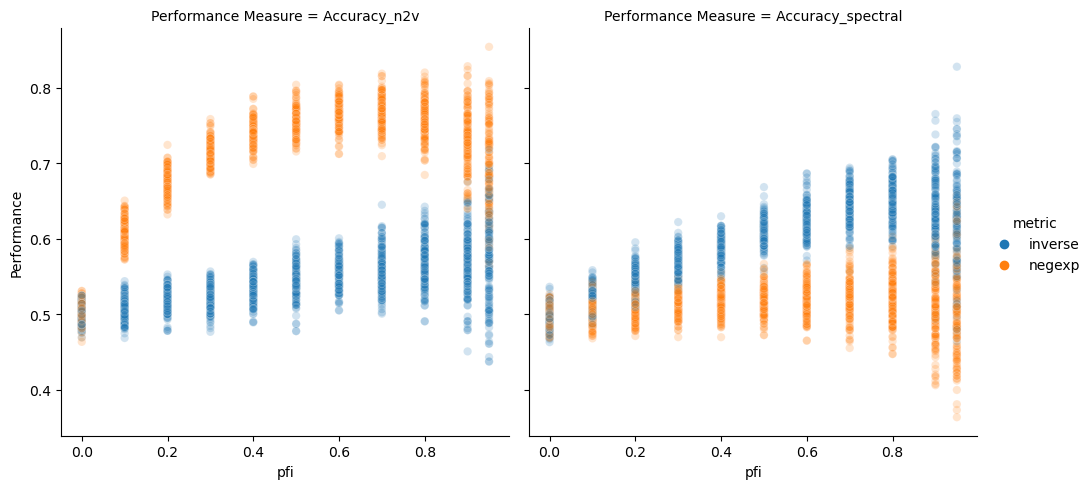

In [80]:
plt.figure()
sns.relplot(
    data=df.loc[df["Performance Measure"].isin(["Accuracy_n2v", "Accuracy_spectral"])], kind="scatter",
    x="pfi", y="Performance",
    col="Performance Measure",
    hue="metric",
    alpha=0.2
)

## Real

<Figure size 1400x1000 with 0 Axes>

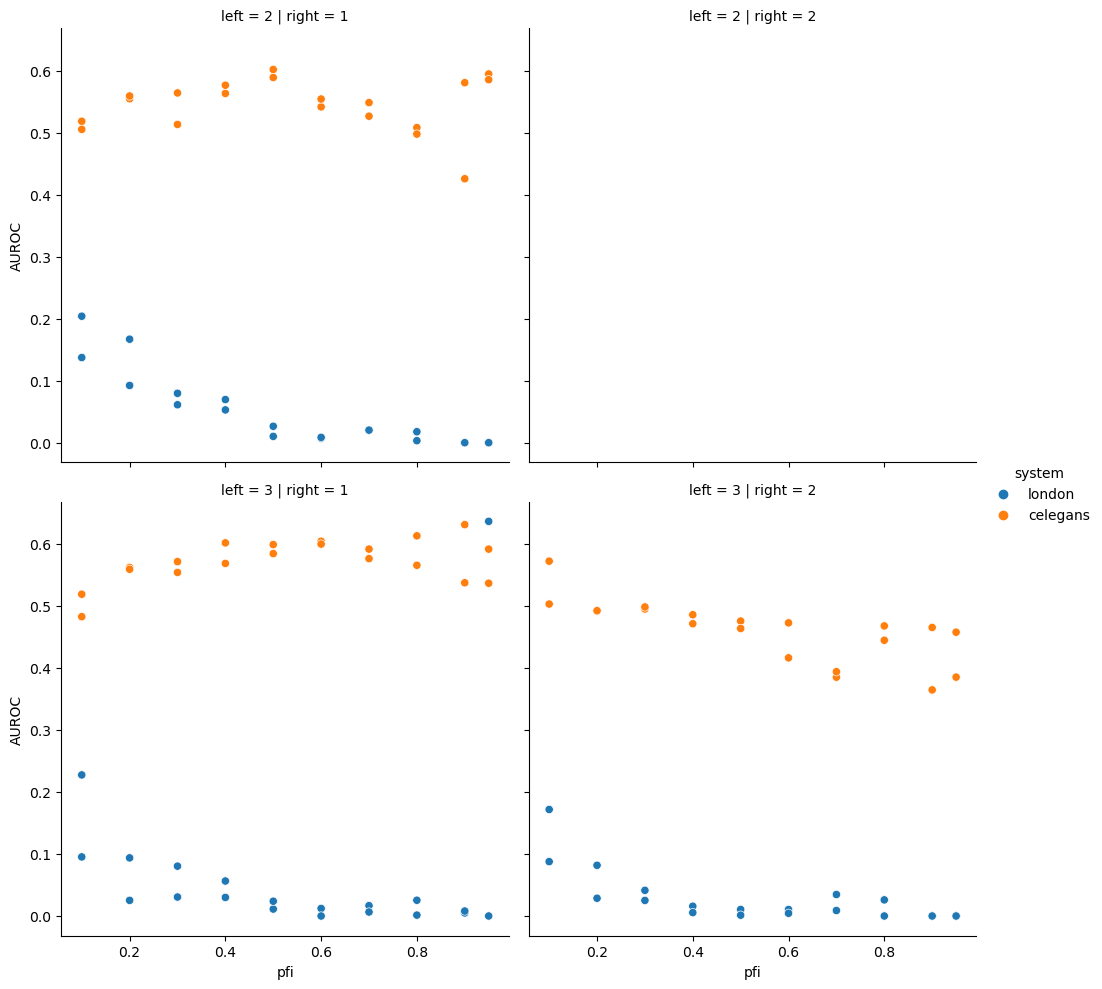

In [7]:
plt.figure()
sns.relplot(
    data=real, kind="scatter",
    x="pfi", y="AUROC",
    hue="system",
    row="left",
    col="right"
)

plt.savefig("../results/plots/scatter_auroc-pfi_EMB_ex04R_DK_20220928.png")